In [1]:
library(bnlearn)


Attaching package: ‘bnlearn’


The following object is masked from ‘package:stats’:

    sigma




In [35]:
install.packages("stringr")


The downloaded binary packages are in
	/var/folders/z1/nhct2gps3y94tkbwqvvd7y_jw6p1l8/T//RtmptvJ9vb/downloaded_packages


In [36]:
library(stringr)

# Causal inference with causal Bayesian networks and R's bnlearn package

In [2]:
dag <- empty.graph(nodes = c("A","S","E","O","R","T"))
arc.set <- matrix(c("A", "E",
                    "S", "E",
                    "E", "O",
                    "E", "R",
                    "O", "T",
                    "R", "T"),
                  byrow = TRUE, ncol = 2,
                  dimnames = list(NULL, c("from", "to")))
arcs(dag) <- arc.set
A.lv <- c("young", "adult", "old")
S.lv <- c("M", "F")
E.lv <- c("high", "uni")
O.lv <- c("emp", "self")
R.lv <- c("small", "big")
T.lv <- c("car", "train", "other")

A.prob <- array(c(0.3,0.5,0.2), dim = 3, dimnames = list(A = A.lv))
S.prob <- array(c(0.6,0.4), dim = 2, dimnames = list(S = S.lv))
E.prob <- array(c(0.75,0.25,0.72,0.28,0.88,0.12,0.64,0.36,0.70,0.30,0.90,0.10), dim = c(2,3,2), dimnames = list(E = E.lv, A = A.lv, S = S.lv))
O.prob <- array(c(0.96,0.04,0.92,0.08), dim = c(2,2), dimnames = list(O = O.lv, E = E.lv))
R.prob <- array(c(0.25,0.75,0.2,0.8), dim = c(2,2), dimnames = list(R = R.lv, E = E.lv))
T.prob <- array(c(0.48,0.42,0.10,0.56,0.36,0.08,0.58,0.24,0.18,0.70,0.21,0.09), dim = c(3,2,2), dimnames = list(T = T.lv, O = O.lv, R = R.lv))
cpt <- list(A = A.prob, S = S.prob, E = E.prob, O = O.prob, R = R.prob, T = T.prob)
bn <- custom.fit(dag, cpt)

In [3]:
dag


  Random/Generated Bayesian network

  model:
   [A][S][E|A:S][O|E][R|E][T|O:R] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


## 1 Building a DAG (4 points)

A DAG maps to a factorization of the joint distribution (e.g., $P(A, B, C) == P(A)P(B|A)P(C|B)$).  In *bnlearn*, you can use the function `modelstring(dag)` to convert a DAG into a string representation of a factorization of the joint probability distribution. We can go from a string representation to a DAG using the function `model2network(string)`.



### (a) Write out the factorization of the joint distribution implied by the DAG using mathematical notation


$$P(A,S,E,O,R,T) = P(A)P(S)P(E|A,S)P(O|E)P(T|O,R)$$

### (b) Rewrite the above factorization in *bnlearn*'s string representation.


In [4]:
dagstr <- '[A][S][E|A:S][O|E][R|E][T|O:R]'

### (c) Use this to create a DAG in *bnlearn*.


In [5]:
dagnetwork <- model2network( dagstr )
dagnetwork


  Random/Generated Bayesian network

  model:
   [A][S][E|A:S][O|E][R|E][T|O:R] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


### (d) Print the class of the DAG object.


In [9]:
class(dagnetwork)

[1] "bn"

### (e) Use `graphviz.plot` to plot the DAG.

Loading required namespace: Rgraphviz



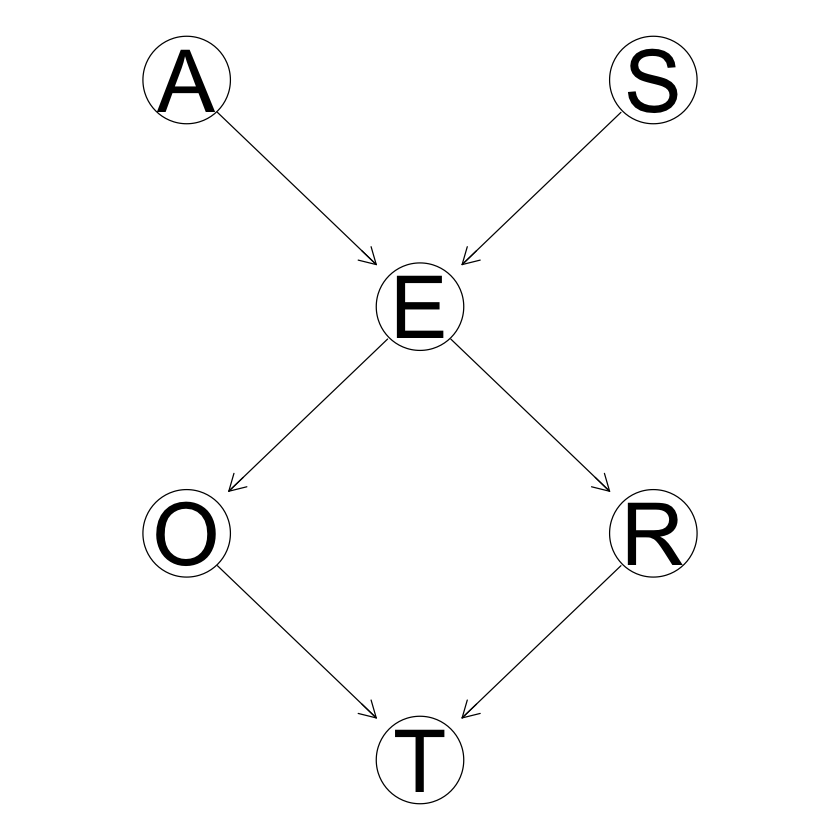

In [6]:
graphviz.plot(dagnetwork)

## 2 Experimenting with graph utilities (6 points)

### (a) Extract and print the nodes and arcs of the DAG you created in previous questions.

In [7]:
nodes(dagnetwork)

[1] "A" "E" "O" "R" "S" "T"

In [16]:
arcs(dagnetwork)

from,to
A,E
S,E
E,O
E,R
O,T
R,T


NULL

### (b) Extract and print the parents and the children of each node using `parents` and `children` functions.

In [8]:
for(node in nodes(dagnetwork)){
    cat("P(", node, "|", parents(dagnetwork, node), ")\n")
    cat("Child(ren) of node ", node, ": ", children(dagnetwork, node), "\n\n")
}

P( A |  )
Child(ren) of node  A :  E 

P( E | A S )
Child(ren) of node  E :  O R 

P( O | E )
Child(ren) of node  O :  T 

P( R | E )
Child(ren) of node  R :  T 

P( S |  )
Child(ren) of node  S :  E 

P( T | O R )
Child(ren) of node  T :   



### (c) Use the `mb` function to extract the Markov blanket of A, E, and T.

In [9]:
for(node in c("A","E", "T")){
    cat("Markov blanket of node ", node , ": ", mb(dagnetwork, node), "\n")
    #cat("Child(ren) of node ", node, ": ", children(dagnetwork, node), "\n\n")
}

Markov blanket of node  A :  E S 
Markov blanket of node  E :  A O R S 
Markov blanket of node  T :  O R 


### (d) Describe, in terms of the joint probability distribution and NOT in terms of the DAG the definition of a Markov blanket.

The Markov blanket of a random variable $X$, $\text{mb}(X)$ is the set of variables that results in $X$ being conditionally independent of the rest of the variables in the joint distribution.  In other words, 

$$P(X|\text{mb}(X),A) = P(X|\text{mb}(X))$$



### (e) How do you identify the Markov blanket from the DAG?

Parents, children, and parents of children of the node.

## 3 Conditional probability distribution (CPD) parameter estimation (4 points)

Bayesian network = DAG + CPD with specified parameters

(a) Fit the parameters of the DAG from the data stored in survey2.txt using Bayesian estimation, and save the result into an object of class bn.fit.  

In [10]:
survey <- read.table('survey2.txt',header=TRUE)
head(survey)

,A,R,E,O,S,T
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,adult,big,high,emp,F,car
2,adult,small,uni,emp,M,car
3,adult,big,uni,emp,F,train
4,adult,big,high,emp,M,car
5,adult,big,high,emp,M,car
6,adult,small,high,emp,F,train


In [12]:
?bn.fit

bn.fit {bnlearn},R Documentation
x,an object of class bn (for bn.fit() and custom.fit()) or an object of class bn.fit (for bn.net).
data,a data frame containing the variables in the model.
cluster,an optional cluster object from package parallel.
dist,"a named list, with element for each node of x. See below."
method,"a character string, either mle for Maximum Likelihood parameter estimation or bayes for Bayesian parameter estimation (currently implemented only for discrete data)."
...,"additional arguments for the parameter estimation procedure, see below."
ordinal,"a vector of character strings, the labels of the discrete nodes which should be saved as ordinal random variables (bn.fit.onode) instead of unordered factors (bn.fit.dnode)."
keep.fitted,"a boolean value. If TRUE, the object returned by bn.fit will contain fitted values and residuals for all Gaussian and conditional Gaussian nodes, and the configurations of the discrete parents for conditional Gaussian nodes."
debug,a boolean value. If TRUE a lot of debugging output is printed; otherwise the function is completely silent.


In [23]:
bn.bayes <- bn.fit( dagnetwork, data= survey, method= "bayes")
bn.bayes$S$prob


        F         M 
0.5468986 0.4531014 

In [44]:
for(node in nodes(bn.bayes)){
    write.table(bn.bayes[[node]]$prob, paste(str_trim(as.character(node)),"-node.tab",sep=""), sep='\t')
}

In [25]:
bn.bayes$A$prob

    adult       old     young 
0.3575391 0.1578417 0.4846193 

In [28]:
class(bn.bayes$E$prob)

[1] "table"

In [30]:
as.data.frame(bn.bayes$O$prob)

O,E,Freq
<fct>,<fct>,<dbl>
emp,high,0.98016416
self,high,0.01983584
emp,uni,0.96531303
self,uni,0.03468697


### (b) Play with the Bayesian prior parameter **iss** and report the changes in the parameters learned from Bayesian network. Explain the changes.

Age (A): It is recorded as young (young) for individuals below 30 years, adult (adult) for individuals between 30 and 60 years old, and old (old) for people older than 60.

Sex (S): The biological sex of individual, recorded as male (M) or female (F).

Education (E): The highest level of education or training completed by the individual, recorded either high school (high) or university degree (uni).

Occupation (O): It is recorded as an employee (emp) or a self employed (self) worker.

Residence (R): The size of the city the individual lives in, recorded as small (small) or big (big).

Travel (T): The means of transport favoured by the individual, recorded as car (car), train (train) or other (other)

In [95]:
node.names <- c("Age","Education","Occupation","Residence","Sex","Travel")
names(node.names) <- nodes(dagnetwork) 
node.names

A            E            O            R            S            T 
       "Age"  "Education" "Occupation"  "Residence"        "Sex"     "Travel"

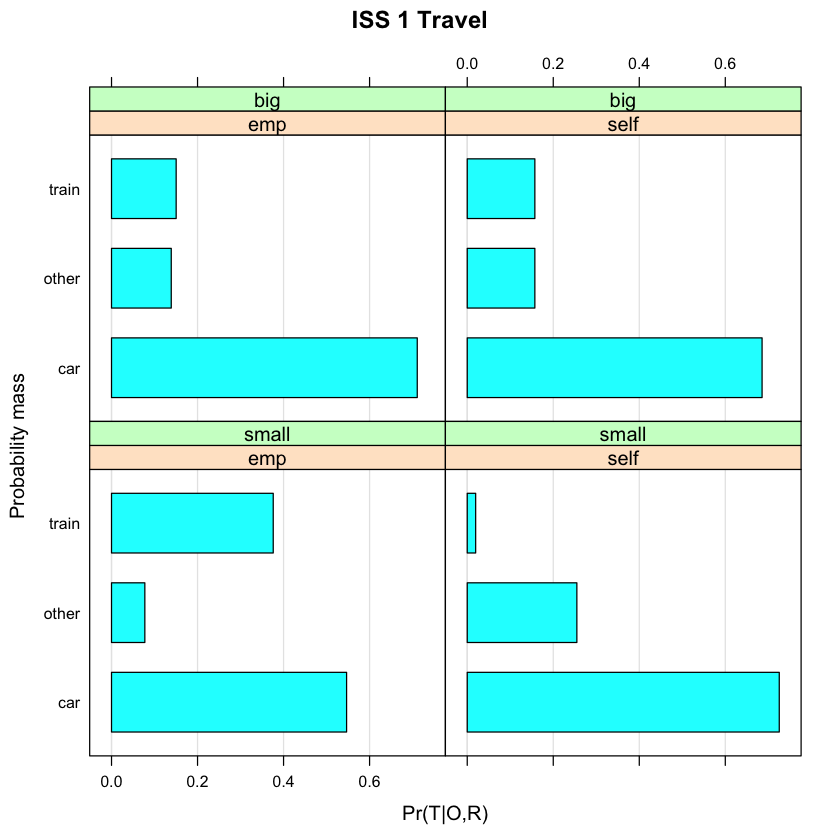

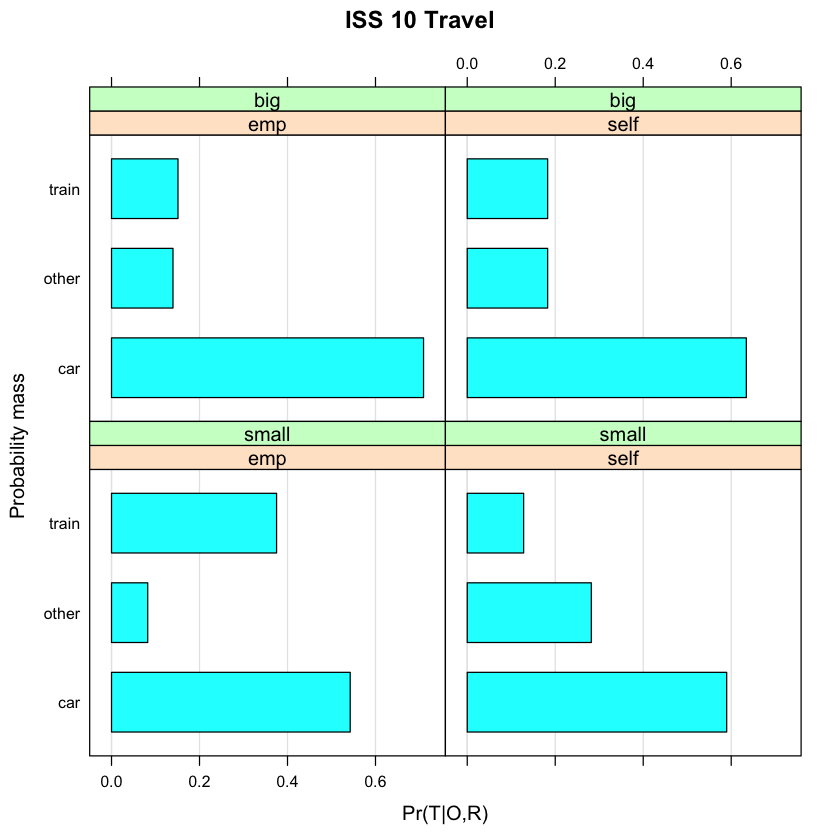

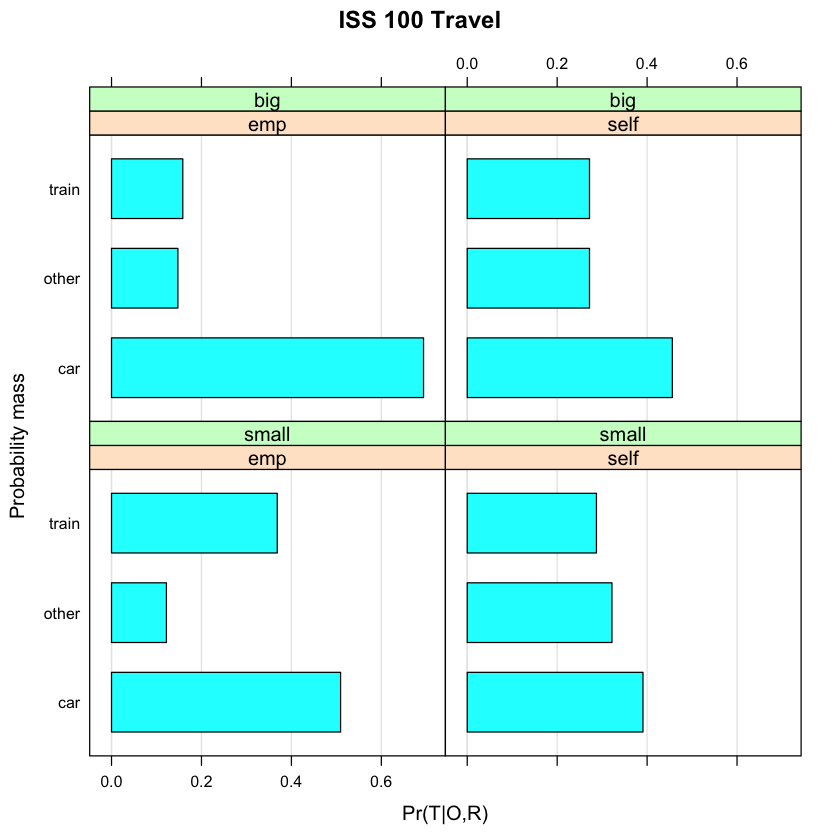

In [123]:
for(iss in c(1,10,100)){
    bn.bayes <- bn.fit( dagnetwork, data= survey, method= "bayes", iss=iss)
    #cat("ISS: ", iss, " BayesNet: ========================================")
    #print(bn.bayes)  
    node <-'T'
    bn.fit.barchart(bn.bayes[['T']], main = paste("ISS", iss,  node.names[[node]]),
                xlab = "Pr(T|O,R)", ylab = "Probability mass")

}


In [113]:
dnodes <-  c(bn.bayes$A, bn.bayes$E, bn.bayes$O, bn.bayes$R, bn.bayes$S,bn.bayes$T)
names(dnodes) <- nodes(dagnetwork)
dnodes[['O']]

[1] "E"

## 4 Graph manipulation (4 points)


### (a) Create a copy of the DAG (e.g. `dag2 <- dag`).  Remove the arc from Education to Occupation, and plot the result with `graphviz.plot`.

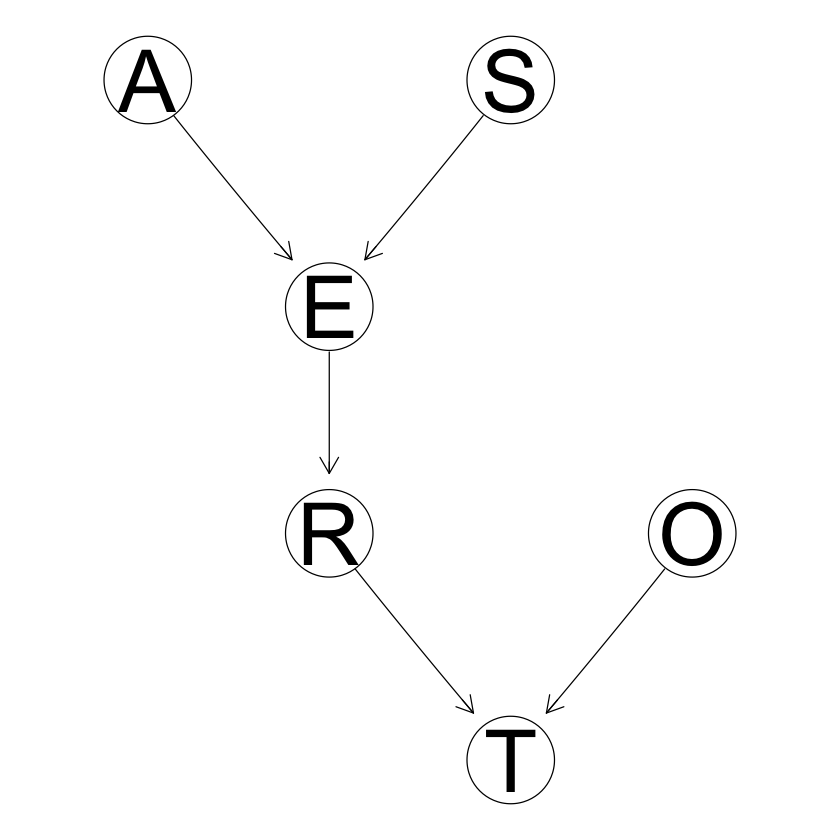

In [40]:
dag2 <- dagnetwork
dag2 <- drop.arc(dag2,'E','O')
graphviz.plot(dag2)

### (b) Fit the parameters of the modified network. Which local distributions change, and how?

In [41]:
bn.bayes2 <- bn.fit( dag2, data= survey, method= "bayes", iss=10)
bn.bayes2


  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
     adult       old     young 
0.3572139 0.1601990 0.4825871 

  Parameters of node E (multinomial distribution)

Conditional probability table:
 
, , S = F

      A
E          adult       old     young
  high 0.6368243 0.8319672 0.1580882
  uni  0.3631757 0.1680328 0.8419118

, , S = M

      A
E          adult       old     young
  high 0.7168246 0.8825000 0.8051724
  uni  0.2831754 0.1175000 0.1948276


  Parameters of node O (multinomial distribution)

Conditional probability table:
        emp       self 
0.96716418 0.03283582 

  Parameters of node R (multinomial distribution)

Conditional probability table:
 
       E
R             high        uni
  big   0.71486486 0.93166667
  small 0.28513514 0.06833333

  Parameters of node S (multinomial distribution)

Conditional probability table:
         F         M 
0.5462687 0.4537313 

  Parameters of node T (multinomial

## 5 Markov equivalence (12 points)

### (a) Compute and plot the PDAG of the DAG for the survey data using the `cpdag` function.  Call this PDAG P1 and the original DAG D1.  How does P1 and D1 compare?  Explain any similarities or differences.

In [47]:
d1 <- dagnetwork
d1


  Random/Generated Bayesian network

  model:
   [A][S][E|A:S][O|E][R|E][T|O:R] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


In [46]:
p1 <- cpdag(d1)
p1


  Random/Generated Bayesian network

  model:
   [A][S][E|A:S][O|E][R|E][T|O:R] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


### (b) Create a DAG D2 that is the same as D1 except that it has a new arc from Occupation to Residence.  This makes sense because surely somebody's job determines where they live (or is it the other way around?).  Note that this is a fine example of applying domain knowledge about the data generative process in causal model development. Plot the result with `graphviz.plot`.

In [50]:
d2 <- set.arc(d1, 'O', 'R')
d2


  Random/Generated Bayesian network

  model:
   [A][S][E|A:S][O|E][R|E:O][T|O:R] 
  nodes:                                 6 
  arcs:                                  7 
    undirected arcs:                     0 
    directed arcs:                       7 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.33 
  average branching factor:              1.17 

  generation algorithm:                  Empty 


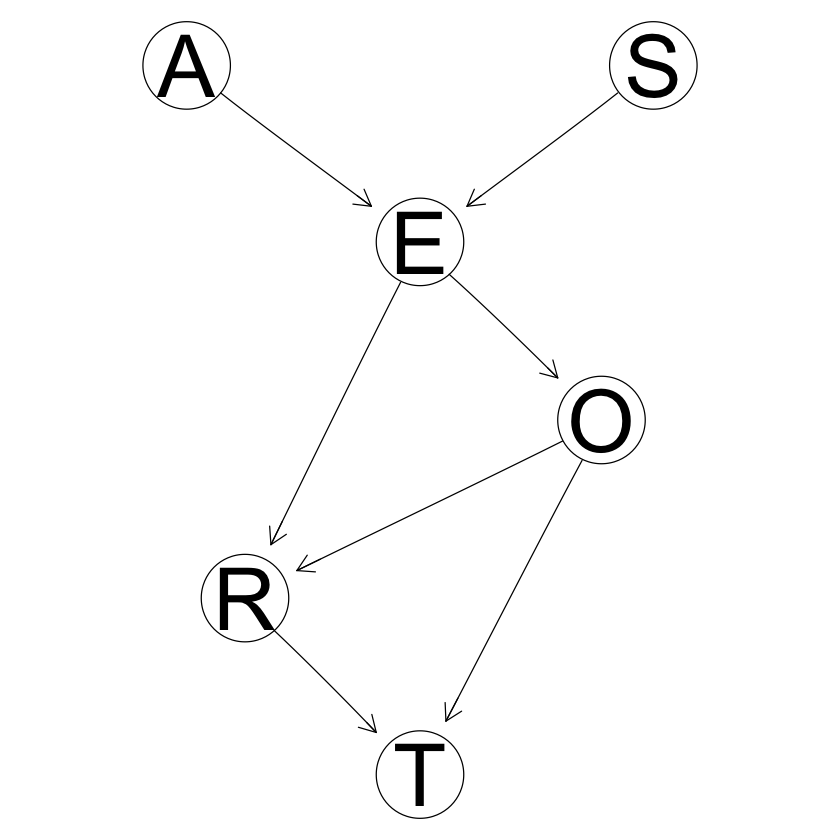

In [48]:
graphviz.plot(d2)

### (c) Now recompute a PDAG P2 from D2.  What, if anything, is different between P1 and P2 and what explains these differences or lack of differences?

In [49]:
p2 <-cpdag( d2 )
p2


  Random/Generated Bayesian network

  model:
    [partially directed graph]
  nodes:                                 6 
  arcs:                                  7 
    undirected arcs:                     1 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.33 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


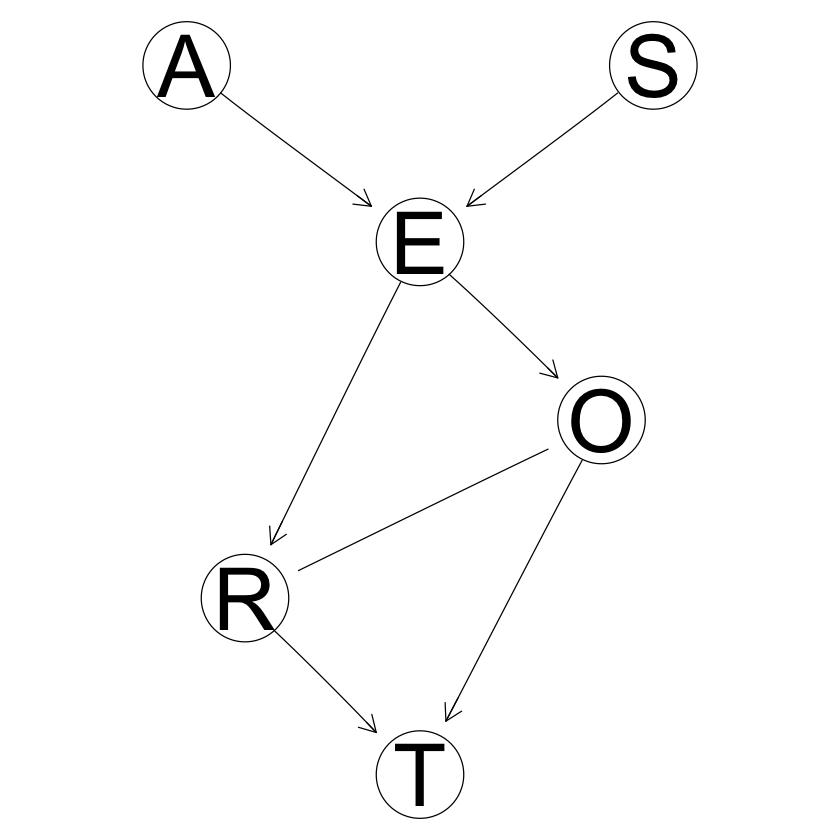

In [51]:
graphviz.plot(p2)

### (d) Create a third DAG D3 that is different from the second DAG (with the O->R edge) but is in the same Markov equivalence class. Do this by reasoning about P2 -- in other words look at P2 and create another DAG D3, such that `cpdag(D3)` will also produce P2.  Plot D3.

In [52]:
d3 <- set.arc(d1, 'R','O')
d3


  Random/Generated Bayesian network

  model:
   [A][S][E|A:S][R|E][O|E:R][T|O:R] 
  nodes:                                 6 
  arcs:                                  7 
    undirected arcs:                     0 
    directed arcs:                       7 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.33 
  average branching factor:              1.17 

  generation algorithm:                  Empty 


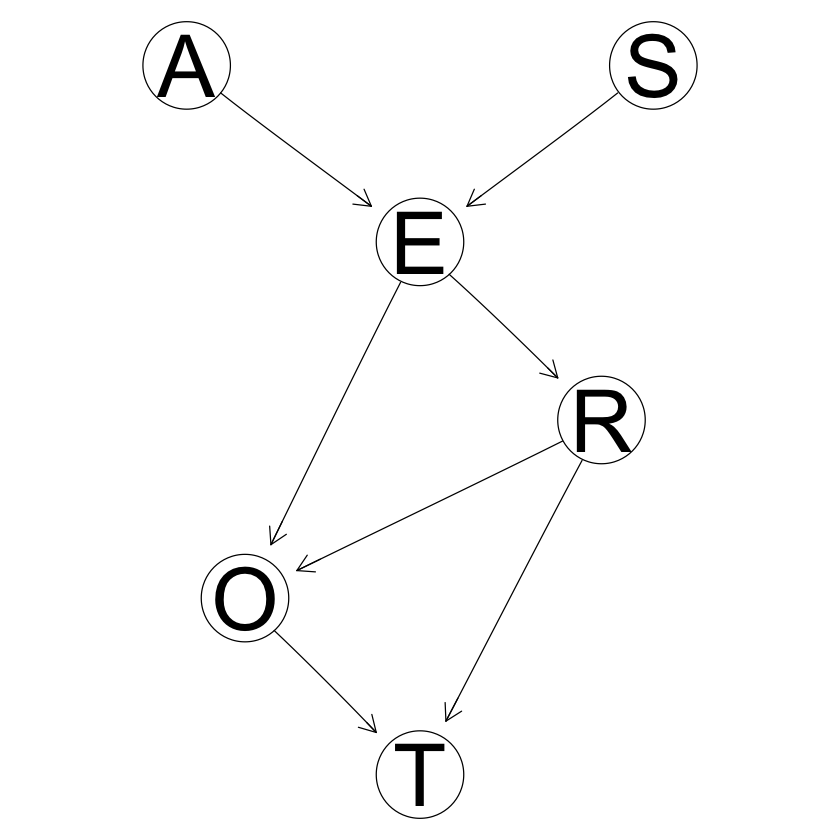

In [53]:
graphviz.plot(d3)

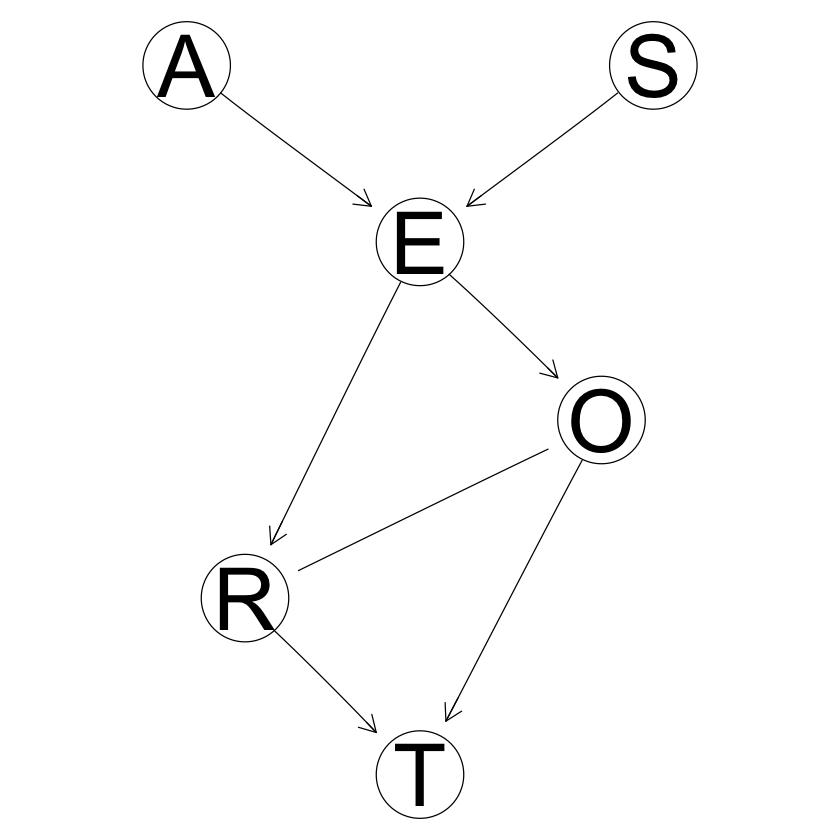

In [54]:
p3 <- cpdag(d3)
graphviz.plot(p3)

### (e) Calculate the log-likelihood of the data given D2 and the log-likelihood of the data given D3.  These values should be the same, explain why.  You can use the `score` function with the argument `type = 'loglik`, or you can simply se the `logLik` function, which is just a wrapper for `score`.  You don't need to provide paramter values for the CPDs of the DAG, `score` will estimate them for you.

In [136]:
score(d1,survey, type = 'loglik')

[1] -2351.839

In [135]:
score(d2, survey,type = 'loglik')

[1] -2350.686

In [134]:
score(d3,survey,type = 'loglik')

[1] -2350.686

## 6 Switching to Pyro (18 points)

If you are new to tensor-based frameworks, make sure you give yourself plenty of time for this question.  It takes time to get used to debugging.  One common source of bugs is integers, *pyro* prefers you use floats (e.g., `torch.tensor(1.0)` instead of `torch.tensor(1)`).  If you hit a bug and solve it, why not share with your classmates on Piazza?

### (a) Use *pyro* to reimplement the Bayesian network with parameter values you fitted in question 3.  Use default *iss* values and round parameter estimates to 2 decimal places.  Show source code.


Answer the following inference questions using `pyro.condition` and (if needed) a *pyro* inference algorithm. 

### (b) You observe a person with a university degree. What is your prediction of this person's means of travel?Provide either a MAP estimate or a histogram of the marginal on the variable "T". 
    

### (c) You observe a self-employed person who lives in a big city. What is your prediction of this person's age?  Provide either a MAP estimate or a histogram of the marginal on the variable "A".  

Hint: An exact inference algorithm such as variable elimination could work here, but it can become intractable on certain networks. One class of approximate inference methods uses random sampling to approximate the distribution. One sampling approach used to answer inference question given observation is rejection sampling. However, it can be wasteful because it rejects all the samples that do not match the observation. A more efficient sampling approach is importance sampling (http://docs.pyro.ai/en/stable/inference_algos.html#module-pyro.infer.importance). We encourage you to experiment with different inference methods in Pyro. Detailed understanding about how these methods work is not the focus or requirement of this course. This course only requires a high level understand of Bayisian inference methods and being able to use them in Pyro.